<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.Titanic/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
from google.colab import drive
import seaborn as sns

In [77]:
def nan_percentage(df, colname):
  return (df[colname].isnull().sum() / df.shape[0]) * 100

In [78]:
# Setting file download from google Drive

drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/'
df_path = 'ML/Datasets/1.Titanic/'

train_path = gdrive_path + df_path + "train.csv"
test_path =  gdrive_path + df_path + "test.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [80]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [81]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [82]:
# Step 1. General Summary
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
# Step 2. Check Nan values in any columns
print(f'Any nan? {train.isnull().values.any()}')
nan_cols = train.loc[:, train.isnull().any()].columns

Any nan? True


In [84]:
for col in nan_cols:
  print(f'Column {col} has {nan_percentage(train, col):.2f} % of Nans')

Column Age has 19.87 % of Nans
Column Cabin has 77.10 % of Nans
Column Embarked has 0.22 % of Nans


In [125]:
# Found, that Cabin has 77% of Nans - remove the column
# Age - substitute with average / median
# Name - can drop the column
train['Age'].fillna(value=train['Age'].mean(), inplace=True)
train.drop(columns=['Cabin'], inplace=True)
train.drop(columns = ['Name'], inplace=True)
train.drop(columns = ['Ticket'], inplace=True)
train.drop(columns = ['PassengerId'], inplace=True)

KeyError: ignored

In [88]:
# Embarked - nominative variable, cannot fill with mean. 
# Remove the rows where Embarked is Nan
train.drop(index=[61, 829], axis=1, inplace=True)
train.loc[train['Embarked'].isnull(),]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [89]:
# Check, any Nans remained
train.isnull().values.any()

False

In [123]:
# Step 2. Encode categorical values
# We have categorical values "Sex", "Embarked" and "Ticket"
print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

numerical_values = {
    "Sex": {'male': 0, 'female': 1},
    "Embarked": {'S': 0, 'C': 1, 'Q': 2},
}

train.replace(numerical_values, inplace=True)
print(train.info())

male      577
female    312
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int32  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float32
 5   SibSp        889 non-null    int32  
 6   Parch        889 non-null    int32  
 7   Fare         889 non-null    float32
 8   Embarked     889 non-null    int64  
dtypes: float32(2), int32(4), int64(3)
memory usage: 48.6 KB
None


In [124]:
# As we see, int64 and float64. 
# Step 3. Change x64 to x32 type, to keep some memory safe
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int32  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float32
 5   SibSp        889 non-null    int32  
 6   Parch        889 non-null    int32  
 7   Fare         889 non-null    float32
 8   Embarked     889 non-null    int64  
dtypes: float32(2), int32(4), int64(3)
memory usage: 48.6 KB


In [95]:
# Int64 to Int32
cols_to_transfer = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', ]
train[cols_to_transfer] = train[cols_to_transfer].astype('int32')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int32  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int32  
 6   Parch        889 non-null    int32  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int32(4), int64(1), object(3)
memory usage: 62.5+ KB


In [96]:
# Float64 to Float32
cols_to_transfer_float = ['Age', 'Fare']
train[cols_to_transfer_float] = train[cols_to_transfer_float].astype('float32')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int32  
 2   Pclass       889 non-null    int32  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float32
 5   SibSp        889 non-null    int32  
 6   Parch        889 non-null    int32  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float32
 9   Embarked     889 non-null    object 
dtypes: float32(2), int32(4), int64(1), object(3)
memory usage: 55.6+ KB


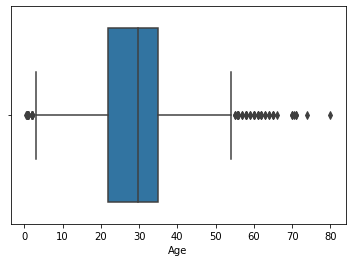

In [100]:
# Step 4. Check outliers
# (Visually and numerically)
sns.boxplot(x = train['Age'])
#sns.boxplot(x = train['Pclass'])

In [113]:
# Check interquartile range
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)

In [111]:
print(q2 - q1)

13.0


In [114]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')